In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(10)

## Data exploration ##

In [2]:
# Read data
df = pd.read_csv("./data/telco_customer_dataset.csv", sep=",")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

In [5]:
# Check if there are duplicate customerIds in the dataset

assert df.shape[0] == df['customerID'].nunique()

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
print("Categorical columns value counts: ")
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts(dropna=False))
        print("--------------------------------------------------------")

Categorical columns value counts: 
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: 

# Feature creation # 

Since we don't have much of the domain knowledge we are not going to create new features as a combination of existing ones. Instead, we will just focus to use each of the existing features separately.

Numerical columns are: **tenure**, **MonthlyCharges** and **TotalCharges**.
Column **TotalCharges** is presented as categorical, instead of numerical, so this needs to be preprocessed and converted to float values. 


Some of the categorical columns such as **gender**, **Partner**, **Dependents**, **PhoneService**, **PaperlessBilling**, **SeniorCitizen** have binary values (can be encoded as 1/0).

Column **MultipleLines** has 3 possible values *Yes/No/No phone service*. Value *No phone service* is directly related to value *No* in **PhoneService** column.  

**InternetService** column has 3 possible values *FiberOptic/DSL/No*. This is important because customers that have value *No* here, don't have any of the services listed in columns **DeviceProtection**, **TechSupport**, **OnlineSecurity**, **OnlineBackup**, **StreamingTV**, **StreamingMovies**. These columns have 3 possible values *yes/no/No internet service* while the customers that doesn't have InternetService (value *No* in this column), have value *No Internet Service* in them. So, instead of encoding *No internet service* value in all columns where this occurs, we could just encode value *No* in **InternetService** column and get rid of redudant features. *No internet service* value we can therefore threat as *No* value in these columns. 

Columns **Contract** and **PaymentMethod** have 3 and 4 possible values, respectively, and all of them will be encoded. 

Column **Churn** is label and from its distribution we can see that the dataset is imbalanced (5174 No vs. 1869 Yes) but not to big extent.

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(float)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}).astype(float)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(float)
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0}).astype(float)
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0}).astype(float)
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0}).astype(float)

In [9]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(float)

In [10]:
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(float)

<AxesSubplot:>

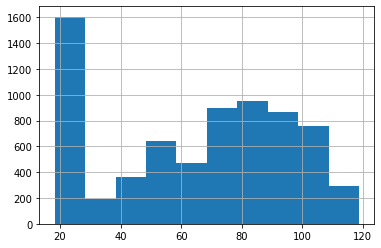

In [11]:
# Plot histogram
df['MonthlyCharges'].hist()

<AxesSubplot:>

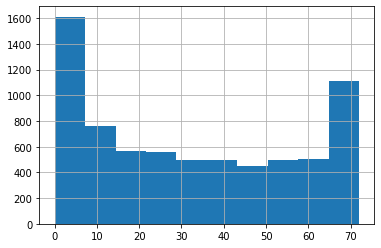

In [12]:
# Plot histogram
df['tenure'].hist()

<AxesSubplot:>

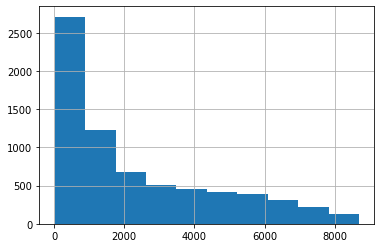

In [13]:
# Convert to float values and plot hist distribution
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.NaN if x.strip() == '' else float(x.strip()))
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['TotalCharges'].hist()

In [14]:
# Pivot columns with 3 or more categorical values
columns_to_pivot = ['InternetService', 'Contract', 'PaymentMethod']
df_pivoted = None
for column_pivot in columns_to_pivot:
    df_tmp_piv = pd.pivot_table(df, 
                                values='Churn', 
                                index='customerID', 
                                columns=column_pivot, 
                                aggfunc='count', 
                                dropna=True, 
                                fill_value=0).reset_index()
    df_tmp_piv.columns = ['customerID'] + [column_pivot + '_' + col for col in df_tmp_piv.columns[1:]]

    assert df_tmp_piv.shape[0] == df.shape[0]
    
    if df_pivoted is None:
        df_pivoted = df_tmp_piv.copy()
    else:
        df_pivoted = df_pivoted.merge(df_tmp_piv, left_on='customerID', right_on='customerID', how='left')

In [15]:
# Merge all feature columns into one dataset
dataset = df_pivoted.merge(df[['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
                                 'DeviceProtection', 'TechSupport', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', \
                                'StreamingMovies', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], left_on='customerID', right_on='customerID', how='left')
print(df_pivoted.head())

   customerID  InternetService_DSL  InternetService_Fiber optic  \
0  0002-ORFBO                    1                            0   
1  0003-MKNFE                    1                            0   
2  0004-TLHLJ                    0                            1   
3  0011-IGKFF                    0                            1   
4  0013-EXCHZ                    0                            1   

   InternetService_No  Contract_Month-to-month  Contract_One year  \
0                   0                        0                  1   
1                   0                        1                  0   
2                   0                        1                  0   
3                   0                        1                  0   
4                   0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                

In [16]:
feature_columns = dataset.columns[1:-1].tolist()

## Feature correlation ## 
After we plot heatmap of feature correlations, we are able to see which features are mostly related to others. For the purpose of simple visualization, we will split correllation range [-1, 1] to 3 bins [-1, -0.3], [-0.3, 0.3], [0.3, 1]. Here we will give overview of some of the most important observations.

From the plot we can see that **InternetService_DSL** mostly goes with *TechSupport* and *InternetSecurity* services, while **InternetService_Fiber optic** goes with services such as *MultipleLines*, *StreamingTV*, *StreamingMovies* and this costs significantly (*TotalCharges*). **PaymentMethod_Electronic check** is mostly related to customers that have *InternetService_Fiber optic* and have *Month-to-month* contracts. **TechSupport** is higly related to *DeviceProtection* and *OnlineSecurity*, but moderately related to *OnlineBackup*, *StreamingTV* and *StreamingVideo* services.

<AxesSubplot:>

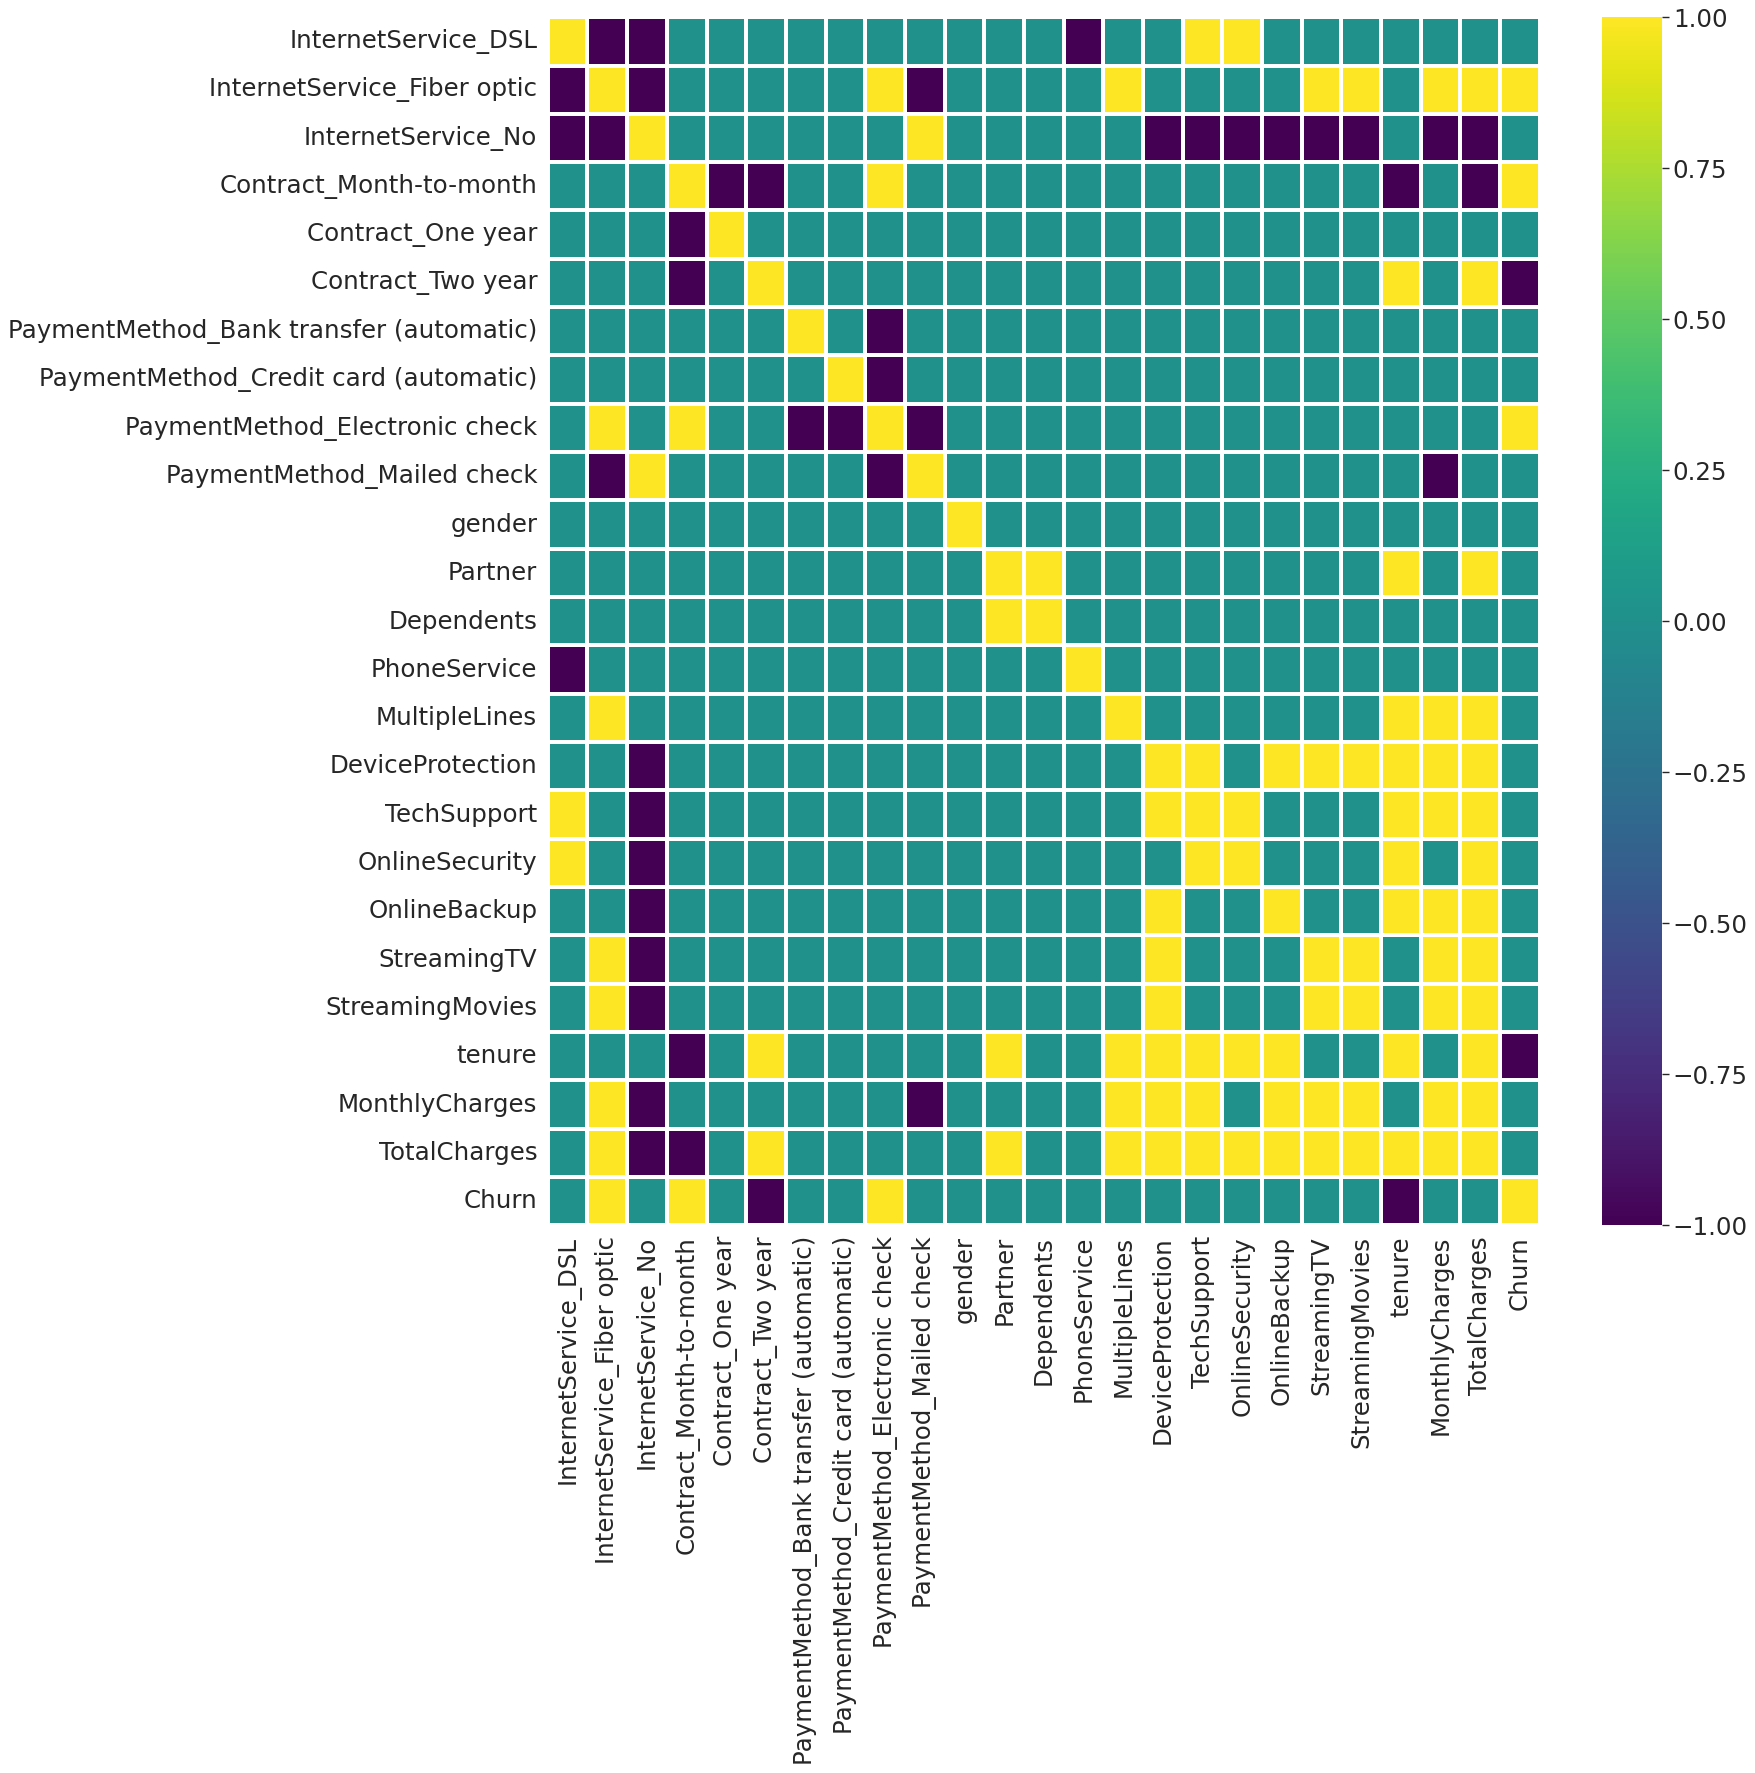

In [17]:
import seaborn as sns

sns.set(font_scale=2)

plt.figure(figsize=(20, 20), dpi=80)

feature_corr = dataset[feature_columns + ['Churn']].corr()
for col in feature_corr.columns:
    feature_corr[col] = feature_corr[col].apply(lambda x: 1 if x > 0.3 else -1 if x < -0.3 else 0)

sns.heatmap(feature_corr, annot=False, fmt="g", cmap='viridis', linewidths=2)

# plt.show()

# Train test split #
We can split our dataset to train and test datasets (ratio 80/20). Since during the process of hyperaparameter search we will be performing cross-validation (5 folds), train dataset will be split accordingly so to choose the best model with optimal parameters. After we get the best model out of few of them, we will train the model on the whole train dataset and evaluate on the test set.

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, train_size=0.8, random_state=10)

X_train, y_train = df_train[feature_columns], df_train['Churn'].tolist()
X_test, y_test = df_test[feature_columns], df_test['Churn'].tolist()

print(X_train.shape)
print(X_test.shape)

(5634, 24)
(1409, 24)


# Scaler ##
From listed histograms above we see that values for numerical columns are relatively uniformly distributed over bins (except maybe *TotalCharges* column, but not drastically), which means that we don't have many outliers. MinMaxScaler would then be prefered option as normalization technique.


In [19]:
# We would like to normalize only numerical columns, but since all other features values vary between 0 and 1, 
# we can apply MinMaxScaler to all features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Hyperparameter optimization ##

In [20]:
# Create ModelFactory so we can easily choose different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

class ModelFactory:
    @classmethod
    def get(cls, model_name, **kwargs):
        if model_name == 'lr':
            return LogisticRegression(**kwargs)
        elif model_name == 'rf':
            return RandomForestClassifier(**kwargs)
        elif model_name == 'gbc':
            return GradientBoostingClassifier(**kwargs)
        elif model_name == 'svm':
            return SVC(**kwargs)
        else: return None
    
    @classmethod
    def get_feature_importances(cls, model, model_name, **kwargs):
        if model_name == 'lr':
            return model.coef_[0]
        elif model_name == 'rf':
            return model.feature_importances_
        elif model_name == 'gbc':
            return model.feature_importances_
        elif model_name == 'svm':
            if kwargs["kernel"] == "linear":
                return model.coef_[0]
            else: return None
        else: return None

In [21]:
# Define parameters distributions in config files (./storage/*.json) and run hyperparameter search for each of them

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
import os
import json


scoring_fn = make_scorer(f1_score)

storage_dir = "./storage"
filename_configs = [f for f in os.listdir(storage_dir) if f.endswith(".json")]

best_score = 0
best_params = None
best_model = None
for filename in filename_configs:
    model_name = filename[:-5]
    print("Running hyperparameter search for: ", model_name)
    param_dist = json.load(open(os.path.join(storage_dir, filename), 'r'))
    model = ModelFactory.get(model_name)
    if model is not None:
        grid_search = GridSearchCV(model, param_grid=param_dist, scoring=scoring_fn, cv=5)
        grid_search.fit(X_train_scaled, y_train)

        print(grid_search.best_score_)
        print(grid_search.best_params_)

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            best_model = model_name


Running hyperparameter search for:  gbc
0.5678545773619115
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Running hyperparameter search for:  svm
0.5870300150342069
{'C': 1, 'kernel': 'linear'}
Running hyperparameter search for:  lr
0.5889628159075642
{'C': 100, 'penalty': 'l2'}
Running hyperparameter search for:  rf
0.5734114605740247
{'max_depth': 50, 'max_leaf_nodes': 100, 'n_estimators': 300}


## Model ##
It follows that the best model is logistic regression model.

In [22]:
# Train the best found model with optimal params

from sklearn.metrics import f1_score, precision_score, recall_score

print("best_model: ", best_model)
print("best_params: ", best_params)

if best_model == 'svm':
    best_params['probability'] = True

model = ModelFactory.get(best_model, **best_params)
model.fit(X_train_scaled, y_train)

pred_train = model.predict(X_train_scaled)
pred_probas_train = model.predict_proba(X_train_scaled)[:, 1]

pred_test = model.predict(X_test_scaled)
pred_probas_test = model.predict_proba(X_test_scaled)[:, 1]

print("Precision train: ", round(precision_score(y_train, pred_train), 2), 
      "Recall train: ", round(recall_score(y_train, pred_train), 2),
     "F1 score train: ", round(f1_score(y_train, pred_train), 2))

print("Precision test: ", round(precision_score(y_test, pred_test), 2), 
      "Recall test: ", round(recall_score(y_test, pred_test), 2), 
      "F1 score test: ", round(f1_score(y_test, pred_test), 2))


best_model:  lr
best_params:  {'C': 100, 'penalty': 'l2'}
Precision train:  0.64 Recall train:  0.55 F1 score train:  0.59
Precision test:  0.64 Recall test:  0.54 F1 score test:  0.59


## Metrics ##
Since the data is imbalanced (negative positive examples ratio is ~ 4:1), there is no point using metrics such as accuracy since predicting always that the example is negative we would get at least 80% of performance. For this task we need to use metrics such as **precision**, **recall** and **f1 score** which take this disbalance into consideration. Here we will calculate these metrics assuming leaving the threshold default value of 0.5, but this value could be further optimized depending on the business requirements. For example, if the business doesn't want to miss any customer that is about to leave, that means that we want higher recall at a cost of low precision. We need to lower the threshold so to "catch" more customers but we will have a lot of false positives as a consequence. This could be seen in the **confussion matrix** and on the **precision recall curve** as well. 

We get precision of 0.64, recall of 0.54 and F1 score of **0.59** on the test set.

**Precision recall curve** says that as we are increasing the recall our precision drops, and this is the reason why the curve is decreasing. Depending on the level of decrease, we may conclude how good our model is. This specific curve presented on the Figure bellow is neither good or bad, because the precision is monotonically dropping as we go to the right, but the slope is not so aggressive.


Also, it was very interesting to see ROC curve for the test dataset. This answers the question: How many customers should we target if we want to detect 80% of churners (or to have a recall od 0.8)? We see from the ROC graph that it is somewhere around 25-28% of the whole population.

In [23]:
sns.set(font_scale=1)

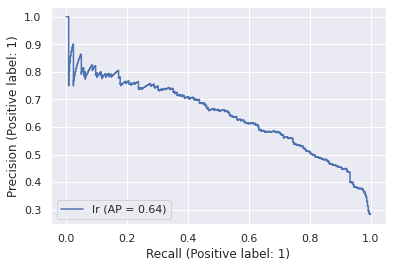

In [24]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_test, pred_probas_test, name=best_model)

/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


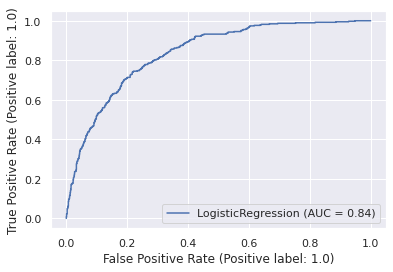

In [25]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test_scaled, y_test)

/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


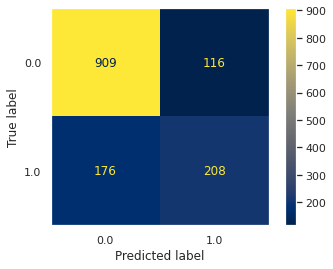

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test_scaled, y_test, cmap='cividis')
plt.grid(False)

## Weighted logistic regression ##

Since the classes are imbalanced, let's try weighting examples so to eliminate this problem and check the results.
This model now reports better results F1 = **0.63**, rather then 0.58 as without weighting. Aslo, precision is lowered to 0.51, but recall is much higher **0.8**. In terms of churn problem, this is a much prefered model for use. We have much more False Positives 283 compared to 123 from the previous model.

In [27]:
best_params['class_weight'] = 'balanced'
model = ModelFactory.get(best_model, **best_params)
model.fit(X_train_scaled, y_train)

pred_train = model.predict(X_train_scaled)
pred_probas_train = model.predict_proba(X_train_scaled)[:, 1]

pred_test = model.predict(X_test_scaled)
pred_probas_test = model.predict_proba(X_test_scaled)[:, 1]

print("Precision train: ", round(precision_score(y_train, pred_train), 2), 
      "Recall train: ", round(recall_score(y_train, pred_train), 2),
     "F1 score train: ", round(f1_score(y_train, pred_train), 2))

print("Precision test: ", round(precision_score(y_test, pred_test), 2), 
      "Recall test: ", round(recall_score(y_test, pred_test), 2), 
      "F1 score test: ", round(f1_score(y_test, pred_test), 2))


Precision train:  0.51 Recall train:  0.81 F1 score train:  0.63
Precision test:  0.51 Recall test:  0.8 F1 score test:  0.63


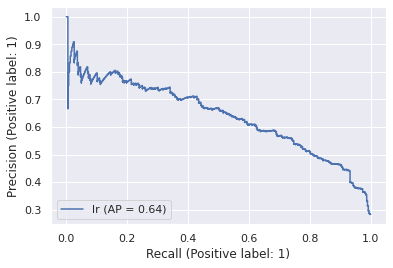

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_test, pred_probas_test, name=best_model)

/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


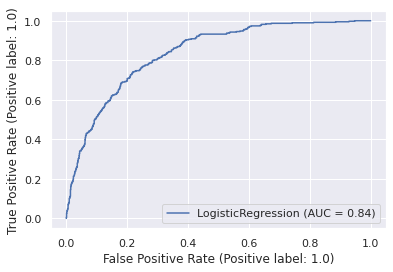

In [29]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test_scaled, y_test)

/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


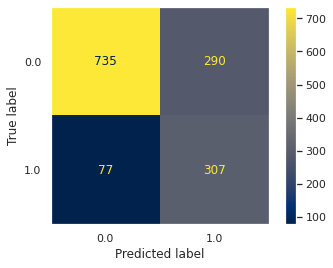

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test_scaled, y_test, cmap='cividis')
plt.grid(False)

## Feature importances ## 
We would like to see which of the features are the most important for the prediction. The most important features that positively affect the model decision that the churn will happen are: **TotalCharges**, **InternetService_Fiber optic**, **Contract_Month-to-month**, **MultipleLines**, **StreamingTV**, **StreaingMovies**. This makes sense in some way because **TotalCharges** are related to the price of the service (customers may be unsatisfied with high prices), **InternetService_Fiber optic** the cause may be unsatisfaction with the provider, **Contract_Month-to-month** means that customers that have this type of contract doesn't feel obligation to stay with the same provider and it is easier for them to leave at any time, **MultipleLines** as the customers may think that they don't need that many services, or they are simply unsatisfied with the quality of **StreamingTV** and **StreamingMovies** service. These are just some assumptions that sound reasonable based on these most important features. Moreover, there are some features that have negative tendency, which means that they affect the final score lowering the probability for a churn. Some of them are quite intuitive and understandable: **tenure** which is number of months the customer has stayed with the company and directly is related to the customer loyalty (loyal customers are less likely to leave), **InternetService_No** says that customers that doesn't have this type of service are more probable to stay, **Contract_Two year** is clear because the customers have signed agreements for longer period and during this period they are safe and without intentions to go, **OnlineSecurity** and **TechSupport** seem like quite important reasons for customer's decision to stay.

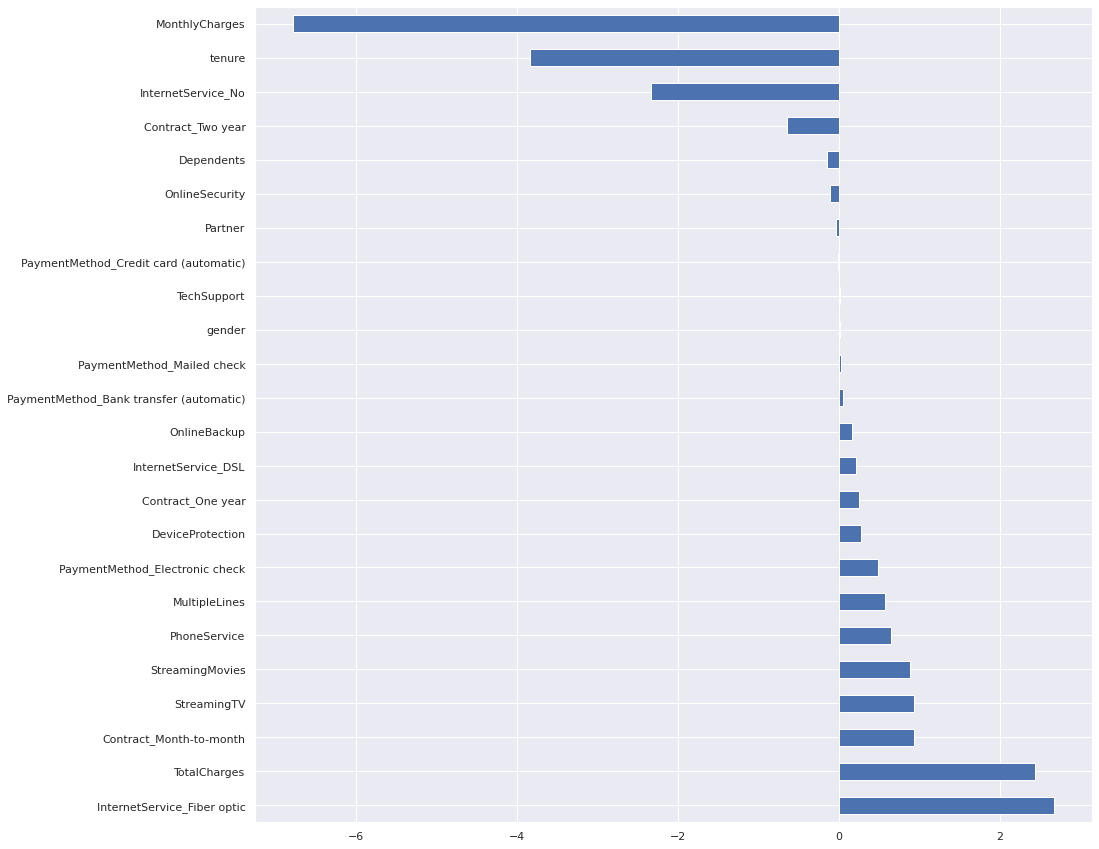

In [31]:
# Feature importances
plt.figure(figsize=(15, 15))
feature_importances = ModelFactory.get_feature_importances(model, best_model, **best_params)
if feature_importances is not None:
    ax = pd.Series(feature_importances, index=feature_columns).nlargest(30).plot(kind='barh') 

## TSNE Approach ##
This approach is just for the purpose of visualizing similarities (distances) between churners and non-churners. TSNE method will compress customer feature vectors to 2d representations which will be visualized and marked. We can see from the plot that even though there is a tendency of churners going to the one side, and non-churners to the other, there is no clear border between them as they interfere. Later we will see some examples of good and bad classifications.

In [32]:
# TSNE approach
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, 
            perplexity=60.0, 
            early_exaggeration=12.0, 
            learning_rate='warn', 
            n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='warn', 
            verbose=0, 
            random_state=None, 
            method='barnes_hut', 
            angle=0.5, 
            n_jobs=-1, 
            square_distances='legacy')

X_embedded = tsne.fit_transform(X_train_scaled)
print(X_embedded.shape)

/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/srdjan/Documents/churn-detection/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(5634, 2)


In [33]:
df_tsne = pd.DataFrame(X_embedded, columns=['dim_0', 'dim_1'])
df_tsne['Churn'] = y_train

<AxesSubplot:xlabel='dim_0', ylabel='dim_1'>

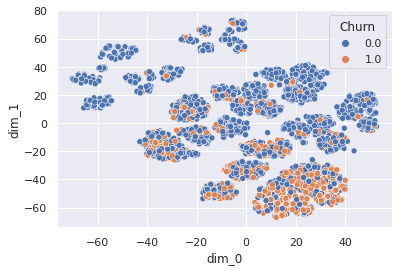

In [34]:
import seaborn as sns

sns.scatterplot(x='dim_0', y='dim_1', hue='Churn', data=df_tsne)


## Churners good and bad examples ##


In [35]:
from sklearn.pipeline import make_pipeline
from lime import lime_tabular

pipeline = make_pipeline(model)
class_names = ['non-churner', 'churner']
explainer = lime_tabular.LimeTabularExplainer(np.reshape(X_test_scaled[0], newshape=(1, len(feature_columns))), 
                                             feature_names=feature_columns, 
                                             class_names=class_names, 
                                             discretize_continuous=False)


#### False Negative ####

Missed detection. The client is churner but not detected by the model.

In [36]:
# FN
idx = 157
exp = explainer.explain_instance(X_test_scaled[idx], pipeline.predict_proba, num_features=24, top_labels=1)

print('Churn Probability =', pipeline.predict_proba([X_test_scaled[idx]])[0,1])
print("True label: ", y_test[idx])

Churn Probability = 0.23288866318524534
True label:  1.0


In [37]:
# FN
exp.show_in_notebook(show_table=True, show_all=False)

#### True Positive ####
The client is churner and is detected by the model.

In [38]:
# TP
idx = 23
exp = explainer.explain_instance(X_test_scaled[idx], pipeline.predict_proba, num_features=24, top_labels=1)

print('Churn Probability =', pipeline.predict_proba([X_test_scaled[idx]])[0,1])
print("True label: ", y_test[idx])

Churn Probability = 0.8921012676769012
True label:  1.0


In [39]:
# TP
exp.show_in_notebook(show_table=True, show_all=False)

#### False Positive ####
False alarm. The client is not a churner and the model says opposite.

In [40]:
# FP
idx = 22
exp = explainer.explain_instance(X_test_scaled[idx], pipeline.predict_proba, num_features=24, top_labels=1)

print('Churn Probability =', pipeline.predict_proba([X_test_scaled[idx]])[0,1])
print("True label: ", y_test[idx])

Churn Probability = 0.8176388594138324
True label:  0.0


In [41]:
# FP
exp.show_in_notebook(show_table=True, show_all=False)

## Conclusion ##
Even though most of the features used for churn prediction are static (doesn't take into consideration client's latest behavior and time perspective) but rather represent its bought services and demographic info, we were able to get some sense of churner's main traits. These are the people that pay a lot for services (probably unsatisfied with that) or have month-to-month subscriptions so they are free to leave at any moment (not obligatory). Also, these customers have multiple services activated, so they probably decide that they don't need these anymore. On the other side, customers that have a long history of using services, smaller bills and not too many services are more likely to stay loyal.

**Suggestions for improvements in churn detection:** 

1. Using the domain knowledge, some new features could be extracted which are not clearly seen from this dataset (eg. combinations of two or three of them, etc.). 
2. If possible, dynamic data with time dimension could be used to aggregate new features (number of days of the last paid bill, time of the last client's activity recorded, customer's latest complaints, etc.)
3. Adding external data (social networks, website clicks, app loggings, user reviews) for the particular customer.
4. Using stronger models (such as feed forward neural networks that detect non-linear relation in input), but lacks explainability.
